In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [ ]:
X_ = np.random.randn(400,2)
sc = StandardScaler()
X_ = sc.fit_transform(X_)
X1 = X_[:,0]
X2 = X_[:,1]

In [ ]:
Y_ = np.zeros(400)
a = 1
for i in range(400):
  if (X_[i][1]**2 - X_[i][0]**2>1):
    Y_[i] = 1
  else :
    Y_[i] = -1

In [ ]:
df1 = pd.DataFrame(X_, columns=['X1','X2'])
df2 = pd.DataFrame(Y_, columns=['Y_'])
frames = [df1,df2]
df = pd.concat(frames, axis=1)
df.head()

,X1,X2,Y_
0,-0.382330,0.733792,-1.0
1,2.054820,-0.374863,-1.0
2,-0.381227,-0.739404,-1.0
3,-0.247889,-0.445945,-1.0
4,1.975694,0.450190,-1.0


<Axes: xlabel='X1', ylabel='X2'>

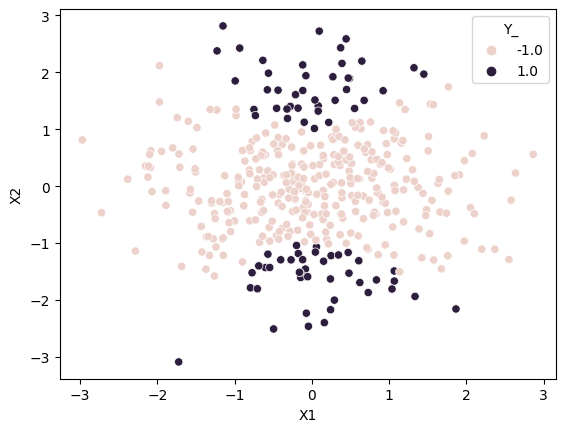

In [ ]:
sns.scatterplot(x='X1',y='X2',hue='Y_',data=df)

In [ ]:
from sklearn.svm import SVC
model = SVC(kernel='poly',degree=2,C=100)
model.fit(X_,Y_)

SVC(C=100, degree=2, kernel='poly')

In [ ]:
yhat = model.predict(X_)

In [ ]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(Y_,yhat)
acc

1.0

In [ ]:
def plot_decision_boundary(pred_func, Y, yhat):
    # Set min and max values and give it some padding
    x_min, x_max = X_[:, 0].min() - .5, X_[:, 0].max() + .5
    y_min, y_max = X_[:, 1].min() - .5, X_[:, 1].max() + .5
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole gid
    Z = pred_func(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    fig, axes = plt.subplots(2)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    axes[0].scatter(X_[:, 0], X_[:, 1], c=Y, cmap=plt.cm.Spectral)
    axes[1].scatter(X_[:, 0], X_[:, 1], c=yhat, cmap=plt.cm.Spectral)

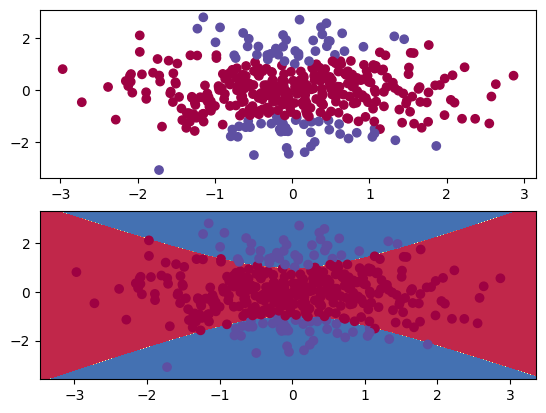

In [ ]:
plot_decision_boundary(lambda x: model.predict(x),Y_, yhat)

Plotting for the radial function

In [ ]:
X = np.random.randn(400,2)
sc = StandardScaler()
X = sc.fit_transform(X)
X1 = X[:,0]
X2 = X[:,1]

In [ ]:
Y = np.zeros(400)
for i in range(400):
  if (X[i][1]**2 + X[i][0]**2 - 1 <0):
    Y[i] = 1
  else :
    Y[i] = -1

In [ ]:
df1 = pd.DataFrame(X, columns=['X1','X2'])
df2 = pd.DataFrame(Y, columns=['Y'])
frames = [df1,df2]
df = pd.concat(frames, axis=1)
df.head()

,X1,X2,Y
0,0.839352,-0.165348,1.0
1,0.843829,1.342426,-1.0
2,0.059637,-0.393144,1.0
3,-0.625098,-2.292090,-1.0
4,1.165525,0.244021,-1.0


<Axes: xlabel='X1', ylabel='X2'>

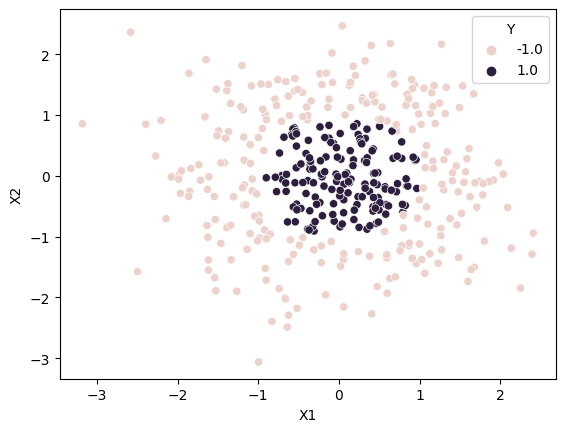

In [ ]:
sns.scatterplot(x='X1',y='X2',hue='Y',data=df)

In [ ]:
svm2 = SVC(kernel='rbf',gamma='auto')

In [ ]:
svm2.fit(X,Y)

SVC(gamma='auto')

In [ ]:
yhat = svm2.predict(X)
acc = accuracy_score(Y,yhat)
acc

0.9825

In [ ]:
def plot_decision_boundary(pred_func):
    # Set min and max values and give it some padding
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole gid
    Z = pred_func(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Spectral)

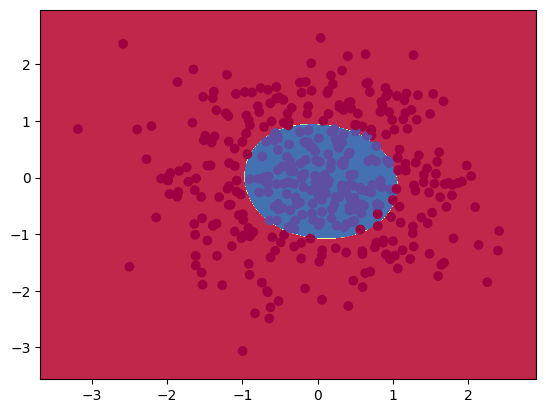

In [ ]:
plot_decision_boundary(lambda x: svm2.predict(x))